# Data Analysis - World Cup Scorers

## L'objectif de cette analyse est de savoir quel footballeur aura le record de buts inscrits en Coupe du Monde

#### Source : https://github.com/jfjelstul/worldcup/blob/master/data-csv/goals.csv

### - Pour commencer, j'importe les librairies nécessaires à l'analyse de données ainsi que ma dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('goals.csv')

### - Elle contient l'intégralité des matchs de Coupe du Monde depuis sa première édition en 1930

In [2]:
df.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,...,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,19',19,0,first half,0,0
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,40',40,0,first half,0,0
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,43',43,0,first half,0,0
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,...,0,T-44,Mexico,MEX,70',70,0,second half,0,0
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,87',87,0,second half,0,0


### - J'effectue une commande qui va me retourner le nom de chaque colonnes

In [3]:
df.columns

Index(['key_id', 'goal_id', 'tournament_id', 'tournament_name', 'match_id',
       'match_name', 'match_date', 'stage_name', 'group_name', 'team_id',
       'team_name', 'team_code', 'home_team', 'away_team', 'player_id',
       'family_name', 'given_name', 'shirt_number', 'player_team_id',
       'player_team_name', 'player_team_code', 'minute_label',
       'minute_regulation', 'minute_stoppage', 'match_period', 'own_goal',
       'penalty'],
      dtype='object')

### - Je fais un tri dans mes colonnes en me séparant de celles dont je n'aurais pas besoin

In [4]:
df = df.drop(columns =['group_name', 'shirt_number','team_id','player_team_id','goal_id','player_team_code',
                       'minute_label','minute_stoppage','own_goal'])

### - J'effectue une commande qui va mepermettre afin de connaître le type de chaque colonne

In [5]:
df.dtypes

key_id                int64
tournament_id        object
tournament_name      object
match_id             object
match_name           object
match_date           object
stage_name           object
team_name            object
team_code            object
home_team             int64
away_team             int64
player_id            object
family_name          object
given_name           object
player_team_name     object
minute_regulation     int64
match_period         object
penalty               int64
dtype: object

In [6]:
df.describe(include = 'all')

,key_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,team_name,team_code,home_team,away_team,player_id,family_name,given_name,player_team_name,minute_regulation,match_period,penalty
count,2720.00000,2720,2720,2720,2720,2720,2720,2720,2720,2720.000000,2720.000000,2720,2720,2720,2720,2720.000000,2720,2720.000000
unique,NaN,22,22,886,708,372,8,81,80,NaN,NaN,1437,1353,879,82,NaN,8,NaN
top,NaN,WC-2022,2022 FIFA World Cup,M-1954-19,Brazil v Sweden,1934-05-27,group stage,Brazil,BRA,NaN,NaN,P-05224,Müller,not applicable,Brazil,NaN,second half,NaN
freq,NaN,172,172,12,28,43,1808,237,237,NaN,NaN,16,29,263,238,NaN,1425,NaN
mean,1360.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626103,0.373897,NaN,NaN,NaN,NaN,51.580882,NaN,0.078676
std,785.34069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.483926,0.483926,NaN,NaN,NaN,NaN,27.534339,NaN,0.269283
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,680.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,28.000000,NaN,0.000000
50%,1360.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,53.000000,NaN,0.000000
75%,2040.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,75.000000,NaN,0.000000


P-05224    16
P-08490    15
P-02173    14
P-03429    13
P-02537    13
P-09516    12
P-06978    12
P-06604    11
P-06982    11
P-02554    10
Name: player_id, dtype: int64


/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


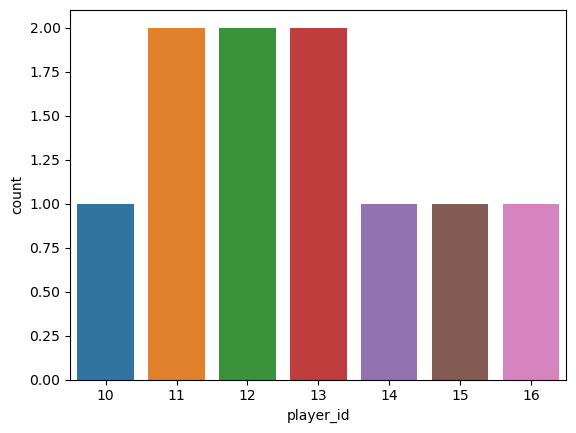

In [101]:
top_10 = df['player_id'].value_counts()[:10]
sns.countplot(l)
print(top_10)

<AxesSubplot:xlabel='player_id', ylabel='player_id'>

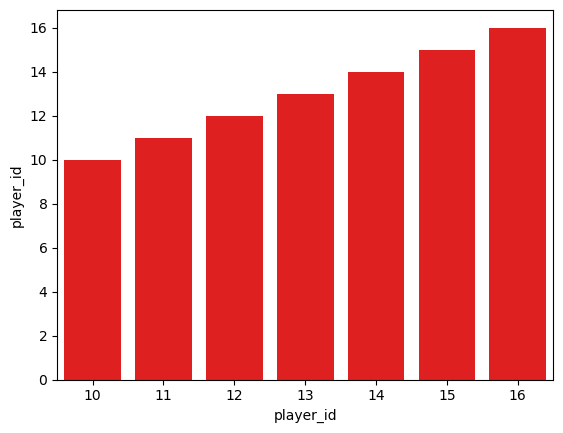

In [100]:
sns.barplot(x = top_10, y = top_10, data = df, color = 'red')

In [11]:
df['minute_label'][1]

"40'"

/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

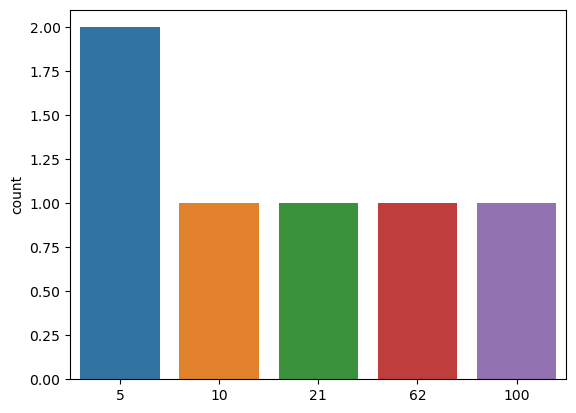

In [50]:
l = [5,5,10,62,21,100]
sns.countplot(l)

In [16]:
(df['family_name'] == 'Klose').sum()

16

In [61]:
len(df['family_name'].unique())

1353

In [22]:
df[ df['family_name'] == 'Klose' ] 

,key_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,team_name,team_code,home_team,away_team,player_id,family_name,given_name,player_team_name,minute_regulation,match_period,penalty
1761,1762,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,20,first half,0
1762,1763,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,25,first half,0
1765,1766,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,70,second half,0
1801,1802,WC-2002,2002 FIFA World Cup,M-2002-17,Germany v Republic of Ireland,2002-06-05,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,19,first half,0
1845,1846,WC-2002,2002 FIFA World Cup,M-2002-35,Cameroon v Germany,2002-06-11,group stage,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,79,second half,0
1918,1919,WC-2006,2006 FIFA World Cup,M-2006-01,Germany v Costa Rica,2006-06-09,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,17,first half,0
1919,1920,WC-2006,2006 FIFA World Cup,M-2006-01,Germany v Costa Rica,2006-06-09,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,61,second half,0
1994,1995,WC-2006,2006 FIFA World Cup,M-2006-34,Ecuador v Germany,2006-06-20,group stage,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,4,first half,0
1995,1996,WC-2006,2006 FIFA World Cup,M-2006-34,Ecuador v Germany,2006-06-20,group stage,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,44,first half,0
2049,2050,WC-2006,2006 FIFA World Cup,M-2006-57,Germany v Argentina,2006-06-30,quarter-finals,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,80,second half,0


In [ ]:
df[df['col1'] == 2]

In [75]:
df.iloc[df['player_id'].value_counts() == 16]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [48]:
df[df['player_id'] == 'P-05224']

,key_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,team_name,team_code,home_team,away_team,player_id,family_name,given_name,player_team_name,minute_regulation,match_period,penalty
1761,1762,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,20,first half,0
1762,1763,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,25,first half,0
1765,1766,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,70,second half,0
1801,1802,WC-2002,2002 FIFA World Cup,M-2002-17,Germany v Republic of Ireland,2002-06-05,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,19,first half,0
1845,1846,WC-2002,2002 FIFA World Cup,M-2002-35,Cameroon v Germany,2002-06-11,group stage,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,79,second half,0
1918,1919,WC-2006,2006 FIFA World Cup,M-2006-01,Germany v Costa Rica,2006-06-09,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,17,first half,0
1919,1920,WC-2006,2006 FIFA World Cup,M-2006-01,Germany v Costa Rica,2006-06-09,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,61,second half,0
1994,1995,WC-2006,2006 FIFA World Cup,M-2006-34,Ecuador v Germany,2006-06-20,group stage,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,4,first half,0
1995,1996,WC-2006,2006 FIFA World Cup,M-2006-34,Ecuador v Germany,2006-06-20,group stage,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,44,first half,0
2049,2050,WC-2006,2006 FIFA World Cup,M-2006-57,Germany v Argentina,2006-06-30,quarter-finals,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,80,second half,0


In [43]:
df[df['family_name'] == 'Ronaldo']

,key_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,team_name,team_code,home_team,away_team,player_id,family_name,given_name,player_team_name,minute_regulation,match_period,penalty
1623,1624,WC-1998,1998 FIFA World Cup,M-1998-18,Brazil v Morocco,1998-06-16,group stage,Brazil,BRA,1,0,P-08490,Ronaldo,not applicable,Brazil,9,first half,0
1713,1714,WC-1998,1998 FIFA World Cup,M-1998-50,Brazil v Chile,1998-06-27,round of 16,Brazil,BRA,1,0,P-08490,Ronaldo,not applicable,Brazil,45,"first half, stoppage time",1
1715,1716,WC-1998,1998 FIFA World Cup,M-1998-50,Brazil v Chile,1998-06-27,round of 16,Brazil,BRA,1,0,P-08490,Ronaldo,not applicable,Brazil,72,second half,0
1744,1745,WC-1998,1998 FIFA World Cup,M-1998-61,Brazil v Netherlands,1998-07-07,semi-finals,Brazil,BRA,1,0,P-08490,Ronaldo,not applicable,Brazil,46,second half,0
1782,1783,WC-2002,2002 FIFA World Cup,M-2002-10,Brazil v Turkey,2002-06-03,group stage,Brazil,BRA,1,0,P-08490,Ronaldo,not applicable,Brazil,50,second half,0
1821,1822,WC-2002,2002 FIFA World Cup,M-2002-26,Brazil v China,2002-06-08,group stage,Brazil,BRA,1,0,P-08490,Ronaldo,not applicable,Brazil,55,second half,0
1860,1861,WC-2002,2002 FIFA World Cup,M-2002-41,Costa Rica v Brazil,2002-06-13,group stage,Brazil,BRA,0,1,P-08490,Ronaldo,not applicable,Brazil,10,first half,0
1861,1862,WC-2002,2002 FIFA World Cup,M-2002-41,Costa Rica v Brazil,2002-06-13,group stage,Brazil,BRA,0,1,P-08490,Ronaldo,not applicable,Brazil,13,first half,0
1897,1898,WC-2002,2002 FIFA World Cup,M-2002-54,Brazil v Belgium,2002-06-17,round of 16,Brazil,BRA,1,0,P-08490,Ronaldo,not applicable,Brazil,87,second half,0
1908,1909,WC-2002,2002 FIFA World Cup,M-2002-62,Brazil v Turkey,2002-06-26,semi-finals,Brazil,BRA,1,0,P-08490,Ronaldo,not applicable,Brazil,49,second half,0


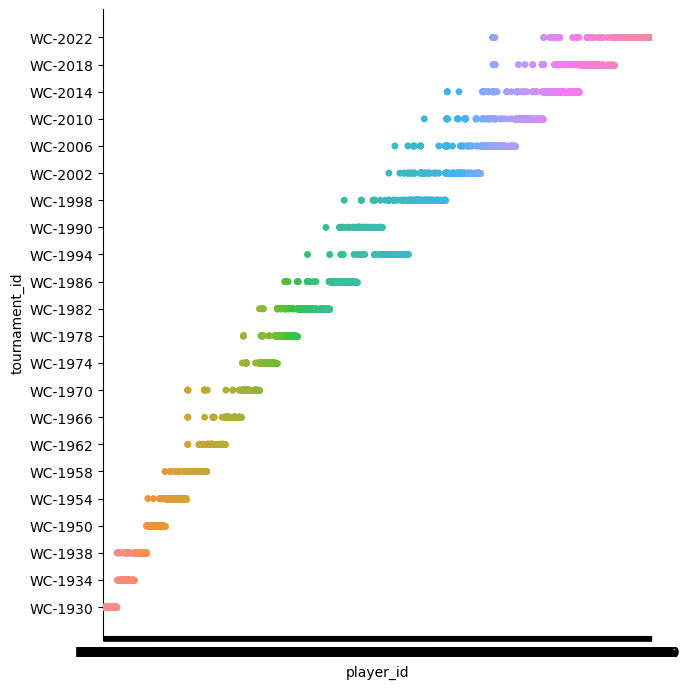

In [69]:
sns.catplot(x="player_id", y="tournament_id", data=df, height=7)

In [83]:
value_counts = df['player_id'].value_counts()

sorted_df = df.loc[df['player_id'].isin(value_counts.index)].sort_values(by='player_id',
            key=lambda x: x.map(value_counts), ascending=False)

sorted_df

,key_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,team_name,team_code,home_team,away_team,player_id,family_name,given_name,player_team_name,minute_regulation,match_period,penalty
1919,1920,WC-2006,2006 FIFA World Cup,M-2006-01,Germany v Costa Rica,2006-06-09,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,61,second half,0
2170,2171,WC-2010,2010 FIFA World Cup,M-2010-51,Germany v England,2010-06-27,round of 16,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,20,first half,0
2073,2074,WC-2010,2010 FIFA World Cup,M-2010-08,Germany v Australia,2010-06-13,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,26,first half,0
2289,2290,WC-2014,2014 FIFA World Cup,M-2014-28,Germany v Ghana,2014-06-21,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,71,second half,0
2192,2193,WC-2010,2010 FIFA World Cup,M-2010-59,Argentina v Germany,2010-07-03,quarter-finals,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,68,second half,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1027,WC-1978,1978 FIFA World Cup,M-1978-33,Austria v West Germany,1978-06-21,second group stage,Austria,AUT,1,0,P-00117,Vogts,Berti,West Germany,59,second half,0
1024,1025,WC-1978,1978 FIFA World Cup,M-1978-31,Netherlands v West Germany,1978-06-18,second group stage,Netherlands,NLD,1,0,P-05989,van de Kerkhof,René,Netherlands,82,second half,0
1021,1022,WC-1978,1978 FIFA World Cup,M-1978-31,Netherlands v West Germany,1978-06-18,second group stage,West Germany,DEU,0,1,P-09321,Abramczik,Rüdiger,West Germany,3,first half,0
1013,1014,WC-1978,1978 FIFA World Cup,M-1978-25,Austria v Netherlands,1978-06-14,second group stage,Netherlands,NLD,0,1,P-04134,van de Kerkhof,Willy,Netherlands,82,second half,0


In [88]:

# prendre les 10 premières lignes
top_10 = sorted_df[:16]

top_10

,key_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,team_name,team_code,home_team,away_team,player_id,family_name,given_name,player_team_name,minute_regulation,match_period,penalty
1919,1920,WC-2006,2006 FIFA World Cup,M-2006-01,Germany v Costa Rica,2006-06-09,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,61,second half,0
2170,2171,WC-2010,2010 FIFA World Cup,M-2010-51,Germany v England,2010-06-27,round of 16,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,20,first half,0
2073,2074,WC-2010,2010 FIFA World Cup,M-2010-08,Germany v Australia,2010-06-13,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,26,first half,0
2289,2290,WC-2014,2014 FIFA World Cup,M-2014-28,Germany v Ghana,2014-06-21,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,71,second half,0
2192,2193,WC-2010,2010 FIFA World Cup,M-2010-59,Argentina v Germany,2010-07-03,quarter-finals,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,68,second half,0
1918,1919,WC-2006,2006 FIFA World Cup,M-2006-01,Germany v Costa Rica,2006-06-09,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,17,first half,0
1761,1762,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,20,first half,0
1762,1763,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,25,first half,0
1995,1996,WC-2006,2006 FIFA World Cup,M-2006-34,Ecuador v Germany,2006-06-20,group stage,Germany,DEU,0,1,P-05224,Klose,Miroslav,Germany,44,first half,0
1765,1766,WC-2002,2002 FIFA World Cup,M-2002-04,Germany v Saudi Arabia,2002-06-01,group stage,Germany,DEU,1,0,P-05224,Klose,Miroslav,Germany,70,second half,0


In [86]:
top_10['id_player'][:10].index.tolist()

KeyError: 'id_player'

In [ ]:
plt.plot()

TypeError: no numeric data to plot

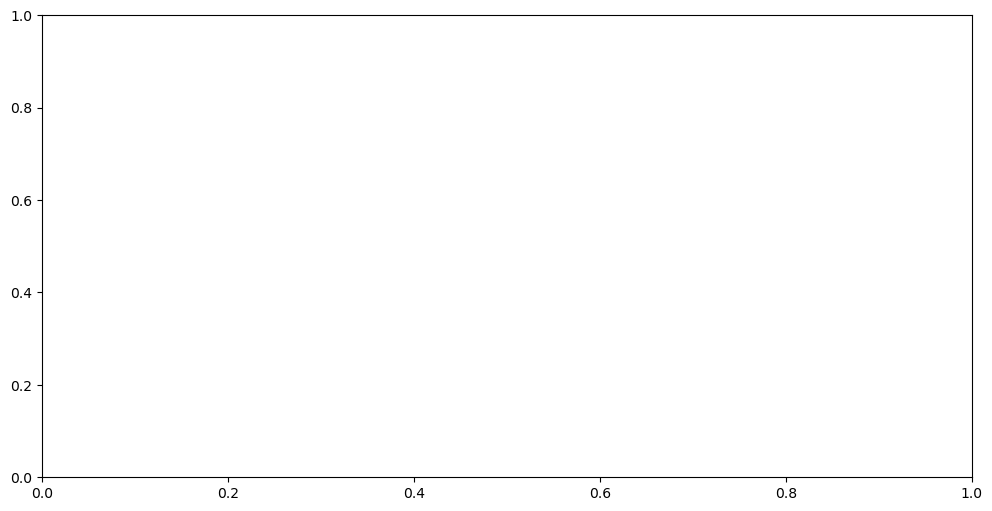

In [103]:
plt.figure(figsize=(12,6))
df['tournament_id'].plot(kind='bar');